In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
#broderick path information
subj='sub-wlsubj001'
broderick_dir = '/Volumes/server/Projects/sfp_nsd/Broderick_dataset'
stim_info = os.path.join(broderick_dir, 'stimuli', 'task-sfprescaled_stim_description.csv')
lh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_varea.mgz')
lh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_eccen.mgz')
lh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_angle.mgz')
lh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_sigma.mgz')
lh_prf_path_list = [lh_eccentricity_path, lh_angle_path, lh_sigma_path, lh_varea_path]

rh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_varea.mgz')
rh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_eccen.mgz')
rh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_angle.mgz')
rh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_sigma.mgz')
rh_prf_path_list = [rh_eccentricity_path, rh_angle_path, rh_sigma_path, rh_varea_path]

betas_path = os.path.join(broderick_dir, 'derivatives', 'GLMdenoise', f'{subj}_ses-04_task-sfprescaled_results.mat')

# Load stimulus information

In [52]:
stim_info = brod.load_broderick_stim_info(stim_info)

In [53]:
mask = brod.make_lh_rh_masks(lh_varea_path, rh_varea_path,
                             lh_eccentricity_path, rh_eccentricity_path,
                             roi="V1", eccen_range=[1, 12])

In [180]:
prf_df = brod.load_lh_rh_prf_proporties_as_df(lh_prf_path_list, 
                                              rh_prf_path_list, 
                                              lh_mask=mask['lh'], rh_mask=mask['rh'], angle_to_radians=True)

In [61]:
betas_df = brod.load_betas_as_df(betas_path, mask, results_names=['models'])

(240885, 48, 100)


In [62]:
betas_df

{'lh':          voxel  class_idx  bootstraps     betas
 0            0          0           0  1.786868
 1            0          0           1  1.799573
 2            0          0           2  1.820887
 3            0          0           3  2.107070
 4            0          0           4  1.487799
 ...        ...        ...         ...       ...
 8553595   1781         47          95  5.409488
 8553596   1781         47          96  6.597688
 8553597   1781         47          97  5.876988
 8553598   1781         47          98  4.704140
 8553599   1781         47          99  5.758471
 
 [8553600 rows x 4 columns],
 'rh':           voxel  class_idx  bootstraps     betas
 0             0          0           0  1.790975
 1             0          0           1  1.807808
 2             0          0           2  2.182446
 3             0          0           3  2.270863
 4             0          0           4  1.852887
 ...         ...        ...         ...       ...
 10684795   2225   

In [169]:
prf_betas_df = brod.merge_prf_and_betas(prf_df, betas_df)
prf_betas_df = brod.concat_lh_and_rh_df(prf_betas_df)

In [177]:
df = brod.merge_stim_df_and_betas_df(prf_betas_df, stim_df, on='class_idx')

In [186]:
df['local_ori'] = prep.calculate_local_orientation(df['w_a'], df['w_r'], df['eccentricity'], angle_in_radians=True, reference_frame='relative')

In [187]:
df['local_sf'], df['local_ori'] = prep.calculate_local_stim_properties(df['w_a'], df['w_r'], 
                                     df['eccentricity'], df['angle'], angle_in_radians=False, reference_frame='relative')

In [3]:

broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
subj_list = [utils.sub_number_to_string(sn, dataset="broderick") for sn in broderick_sn_list]

In [6]:
roi='V1'
for sub in subj_list[:1]:
    subj=f'sub-{sub}'
    broderick_dir = '/Volumes/server/Projects/sfp_nsd/Broderick_dataset'
    stim_info_path = os.path.join(broderick_dir, 'stimuli', 'task-sfprescaled_stim_description.csv')
    lh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_varea.mgz')
    lh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_eccen.mgz')
    lh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_angle.mgz')
    lh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_sigma.mgz')
    lh_prf_path_list = [lh_eccentricity_path, lh_angle_path, lh_sigma_path, lh_varea_path]
    
    rh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_varea.mgz')
    rh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_eccen.mgz')
    rh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_angle.mgz')
    rh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_sigma.mgz')
    rh_prf_path_list = [rh_eccentricity_path, rh_angle_path, rh_sigma_path, rh_varea_path]
    
    betas_path = os.path.join(broderick_dir, 'derivatives', 'GLMdenoise', f'{subj}_ses-04_task-sfprescaled_results.mat')
    bd_df = brod.make_broderick_sf_dataframe(stim_info_path,
                                            lh_varea_path, rh_varea_path, 
                                            lh_eccentricity_path, rh_eccentricity_path,
                                            lh_prf_path_list, rh_prf_path_list,
                                            betas_path,
                                            eccen_range=[1,12], roi="V1",
                                            angle_to_radians=True,
                                            results_names=['modelmd'])
    bd_df = vs.select_voxels(bd_df, drop_by='pRFcenter',
                              inner_border=1, outer_border=12,
                              to_group=['voxel'], return_voxel_list=False)
    bd_dir_save = '/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/broderick'
    #bd_df.to_csv(os.path.join(bd_dir_save, f'dset-broderick_{subj}_roi-{roi}'))

In [16]:
ww = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/broderick/dset-broderick_sub-wlsubj001_roi-V1_vs-pRFsize_tavg-True.csv')
ww2 = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/before_w_a_correction/dataframes/broderick/dset-broderick_sub-wlsubj001_roi-V1_vs-pRFsize.csv')
ww3 = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/before_w_a_correction/dataframes/broderick/dset-broderick_sub-wlsubj001_roi-V1_vs-pRFsize_tfunc-uncorrected.csv')

In [17]:
ww.query('voxel==0')[['voxel','names','w_a','w_r','eccentricity','angle','local_ori','local_sf']]

,voxel,names,w_a,w_r,eccentricity,angle,local_ori,local_sf
0,0,pinwheel,-6.0,0.0,2.565532,4.733885,0.021496,0.372215
3305,0,pinwheel,-8.0,0.0,2.565532,4.733885,0.021496,0.496287
6610,0,pinwheel,-11.0,0.0,2.565532,4.733885,0.021496,0.682394
9915,0,pinwheel,-16.0,0.0,2.565532,4.733885,0.021496,0.992574
13220,0,pinwheel,-23.0,0.0,2.565532,4.733885,0.021496,1.426825
16525,0,pinwheel,-32.0,0.0,2.565532,4.733885,0.021496,1.985147
19830,0,pinwheel,-45.0,0.0,2.565532,4.733885,0.021496,2.791613
23135,0,pinwheel,-64.0,0.0,2.565532,4.733885,0.021496,3.970294
26440,0,pinwheel,-91.0,0.0,2.565532,4.733885,0.021496,5.645262
29745,0,pinwheel,-128.0,0.0,2.565532,4.733885,0.021496,7.940589


In [18]:
ww2.query('voxel==0')[['voxel','names','w_a','w_r','eccentricity','angle','local_ori','local_sf']]

,voxel,names,w_a,w_r,eccentricity,angle,local_ori,local_sf
0,0,pinwheel,6.0,0.0,2.565532,4.733885,0.021496,0.372215
1,0,pinwheel,6.0,0.0,2.565532,4.733885,0.021496,0.372215
2,0,pinwheel,6.0,0.0,2.565532,4.733885,0.021496,0.372215
3,0,pinwheel,6.0,0.0,2.565532,4.733885,0.021496,0.372215
4,0,pinwheel,6.0,0.0,2.565532,4.733885,0.021496,0.372215
...,...,...,...,...,...,...,...,...
15533595,0,mixtures,-31.0,8.0,2.565532,4.733885,0.274051,1.986116
15533596,0,mixtures,-31.0,8.0,2.565532,4.733885,0.274051,1.986116
15533597,0,mixtures,-31.0,8.0,2.565532,4.733885,0.274051,1.986116
15533598,0,mixtures,-31.0,8.0,2.565532,4.733885,0.274051,1.986116


In [19]:
ww3.query('voxel==0')[['voxel','names','w_a','w_r','eccentricity','angle','local_ori','local_sf']]

,voxel,names,w_a,w_r,eccentricity,angle,local_ori,local_sf
0,0,pinwheel,6.0,0.0,2.565532,1.5493,3.120096,0.372215
3305,0,pinwheel,8.0,0.0,2.565532,1.5493,3.120096,0.496287
6610,0,pinwheel,11.0,0.0,2.565532,1.5493,3.120096,0.682394
9915,0,pinwheel,16.0,0.0,2.565532,1.5493,3.120096,0.992574
13220,0,pinwheel,23.0,0.0,2.565532,1.5493,3.120096,1.426825
16525,0,pinwheel,32.0,0.0,2.565532,1.5493,3.120096,1.985147
19830,0,pinwheel,45.0,0.0,2.565532,1.5493,3.120096,2.791613
23135,0,pinwheel,64.0,0.0,2.565532,1.5493,3.120096,3.970294
26440,0,pinwheel,91.0,0.0,2.565532,1.5493,3.120096,5.645262
29745,0,pinwheel,128.0,0.0,2.565532,1.5493,3.120096,7.940589


In [18]:
test = pd.DataFrame({'hemi': ['lh','lh','lh','lh','lh'], 'angle': [0, 45, 90, 135, 180]})
test = test.append(pd.DataFrame({'hemi': ['rh','rh','rh','rh','rh'], 'angle': [0, 45, 90, 135, 180]}))
test

,hemi,angle
0,lh,0
1,lh,45
2,lh,90
3,lh,135
4,lh,180
0,rh,0
1,rh,45
2,rh,90
3,rh,135
4,rh,180


In [22]:
test['new_angle_-90'] = test.apply(brod._transform_angle, axis=1)

In [24]:
test['new_angle_+90'] = test.apply(brod._transform_angle_corrected, axis=1)

In [28]:
pd.concat((test,answer), axis=1)

,hemi,angle,new_angle_-90,new_angle_+90,hemi,angle
0,lh,0,270,90,lh,90
1,lh,45,315,135,lh,135
2,lh,90,0,180,lh,180
3,lh,135,45,225,lh,225
4,lh,180,90,270,lh,270
0,rh,0,270,90,rh,90
1,rh,45,225,45,rh,45
2,rh,90,180,0,rh,360
3,rh,135,135,315,rh,315
4,rh,180,90,270,rh,270


In [3]:
#1
ground_truth = np.arange(0, 360)
#2
noah_angles = np.flip(np.arange(0,90))
noah_angles = np.concatenate((noah_angles, np.arange(0,180)))
noah_angles = np.concatenate((noah_angles, np.flip(np.arange(90,180))))
#3
adjusted_noah_angles = np.flip(np.arange(0,90))
adjusted_noah_angles = np.concatenate((adjusted_noah_angles, np.flip(np.arange(-180,0))))
adjusted_noah_angles = np.concatenate((adjusted_noah_angles, np.flip(np.arange(90,180))))
#4
billy_angles = np.mod((adjusted_noah_angles-90), 360)

#5
new_adjusted_noah_angles = np.arange(-90,0)
new_adjusted_noah_angles = np.concatenate((new_adjusted_noah_angles, np.arange(0,180)))
new_adjusted_noah_angles = np.concatenate((new_adjusted_noah_angles, np.arange(-180,-90)))
#6
corrected_angles = np.mod((new_adjusted_noah_angles+90), 360)

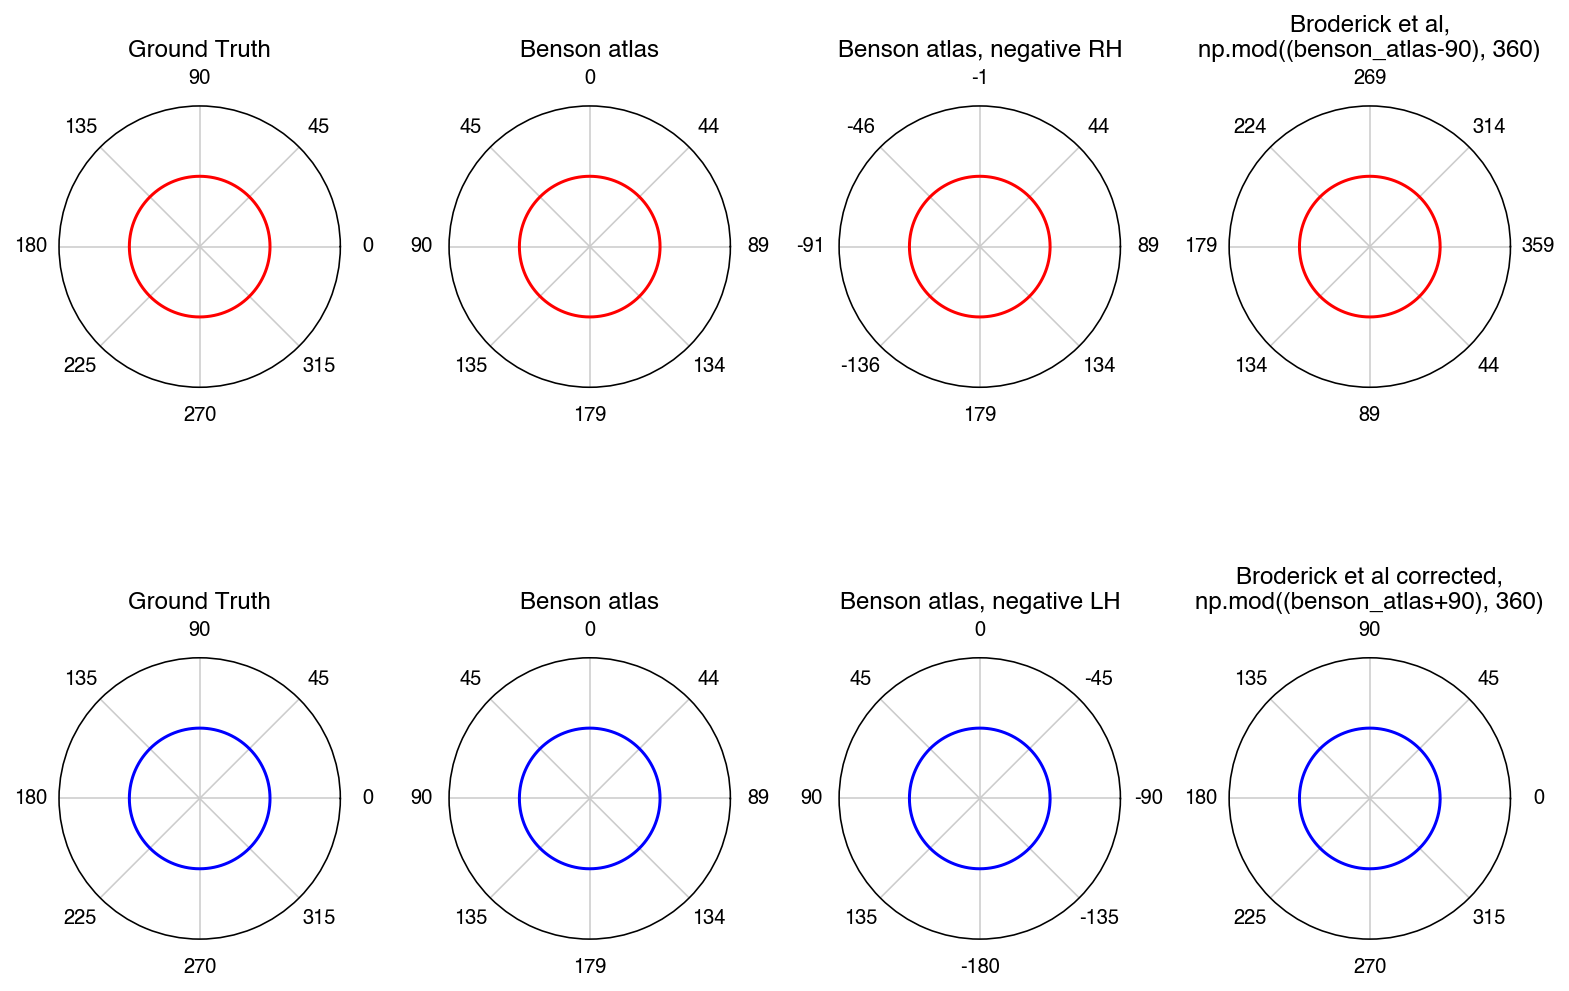

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'figure.dpi': 72 * 2,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)

every=45
fig, axes = plt.subplots(2,4, figsize=(11, 8), subplot_kw=dict(polar=True))

for i, ax in enumerate(axes.flatten()):
    # Remove all x and y ticks
    ax.set_xticks([])  # Remove x ticks (theta)
    ax.set_yticks([])  # Remove y ticks (r)
    if i < 4:
        c = 'r'
    else:
        c = 'b'
    ax.plot(np.deg2rad(ground_truth), [1]*360, color=c)
    ax.set_xticks(np.deg2rad(ground_truth)[::every])

axes[0,0].set_title('Ground Truth')
axes[0,1].set_title('Benson atlas')
axes[0,2].set_title('Benson atlas, negative RH')
axes[0,3].set_title('Broderick et al,\nnp.mod((benson_atlas-90), 360)')
axes[1,0].set_title('Ground Truth')
axes[1,1].set_title('Benson atlas')
axes[1,2].set_title('Benson atlas, negative LH')
axes[1,3].set_title('Broderick et al corrected,\nnp.mod((benson_atlas+90), 360)')


axes[0,0].set_xticklabels(ground_truth[::every])
axes[0,1].set_xticklabels(noah_angles[::every])
axes[0,2].set_xticklabels(adjusted_noah_angles[::every])
axes[0,3].set_xticklabels(billy_angles[::every])
axes[1,0].set_xticklabels(ground_truth[::every])
axes[1,1].set_xticklabels(noah_angles[::every])
axes[1,2].set_xticklabels(new_adjusted_noah_angles[::every])
axes[1,3].set_xticklabels(corrected_angles[::every])


plt.tight_layout()

In [123]:
prf_dict = {}
prf_dict['lh_angle'] = [0, 45, 90, 135, 180]
prf_dict['rh_angle'] = [0, 45, 90, 135, 180]

brod.prf_mgzs_to_df(prf_dict, angle_to_radians=False, transform_func=brod._transform_angle_baseline)

lh
Before transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
After transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
rh
Before transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
After transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []


{'lh':    voxel  angle hemi
 0      0     90   lh
 1      1     45   lh
 2      2      0   lh
 3      3    315   lh
 4      4    270   lh,
 'rh':    voxel  angle hemi
 0      0     90   rh
 1      1    135   rh
 2      2    180   rh
 3      3    225   rh
 4      4    270   rh}

In [ ]:
prf